# Programming for Data Science 2023

## Homework Assigment Three

Homework Assigment Three focus in the step-by-step implementation of a simple, yet popular, clustering algorithm, the **K-Means**. Although in most projects you will source algorithms from readily available implementations found in libraries such as scikit-learn or Keras, in some cases you will need to implement an algorithm yourself. For instance, if such algorithm is not available or if you want to implement a problem-specific modification. In that sense, learning to implement algorithms is an important part of your skillset.

Your submission will be graded according to the following guidelines:
1. **Execution** (does your program does what is asked from the exercise?
2. **Objectivity** (are you using the adequate libraries? are you using a library ... )
3. **Readibility** of your code (that includes comments, naming of variables, supporting text, etc ...)

Some questions might require that you make critical decisions, or design choices. In such cases, you will be graded according to your ability to justify and support your decisions.

<b>Comment your code properly, which includes naming your variables in a meaningful manner. Badly documented code will be penalized.</b>

This assignment is to be done in pairs, and remember that **you can't have the same pair as you had in Homeworks 1 and 2**. 

**Students that are caught cheating will obtain a score of 0 points.** <br>

The Homework 3 is worth 30% of your final grade.    

The submission package should correspond to a .zip archive (.rar files are not accepted) with the following files:
1. Jupyter Notebook with the output of all the cells;
2. PDF/HTML print of your Jupyter Notebook (in jupyter go to File -> Download as -> HTML/PDF);
3. All text or .csv files exported as part of the exercises (if they exist). Do not upload the files downloaded/imported as part of the exercises.

**Please change the name of the notebook to "H3_\<student_1_id\>_\<student_2_id\>.ipynb", replacing \<student_id\> by your student_id.** <br>

Submission is done through the respective Moodle activity and only one of the group members has to submit the files. <br>
Deadline is the 26th of October at 23:59. <br>
A penality of 1 point per day late will be applied to late deliveries. <br>

## **In this notebook you are allowed to use Pandas and Numpy.**

## Group Registration

Edit this cell with the information of the authors of this submission.

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
| 1    |      Adriana Costinha        |       20230567         | 
| 2    |      Susana Pires        |       20230540         | 

## Clustering with K-Means

K-means is one of the simplest clustering algorithms, which you may already know from the course Data Mining. The K-means Algorithm consists in writing a program that proceeds as follows:

1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids. This can be done by randomly selecting K points from the dataset as the initial locations of the centroids;
3. Compute the distance of all the other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position. This can be done by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids do not change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you have repeated these steps for specified number of iterations (niter)

The algorithm is thus parameterized by the **number of clusters (K)**, the **maximum number of iterations** (niter), and the **tolerance threshold (tol)**.

### Step 1

Let us start by importing the necessary libraries to execute this homework. <br>
Import **numpy, Scipy, and pandas** using, respectively, the **aliases np, sc, and pd**.

<span style="color:red">**These are the only libraries you are allowed to use in the remaining of the steps, unless explicitly said the opposite/if the library is imported in the cells below.**</span>

In [1]:
import numpy as np
import scipy as sc
import pandas as pd

It is important that we devise a strategy to **test our code at each step**, in order to assess if it performs as expected. To that end, we have split each step of the algorithm in different blocks, and we ask you to test each block against a simple scenario where the outcome is predictable and can be computed by hand. In some steps, however, we want to pass a more comprehensive data set with similar properties to the real dataset we will be working with.<br>

Such test datasets try to create realistic conditions in which your algorithm is expected to work correctly, and for which we can also assess if the solution matches our expectation and have a general understanding if the algorithm performs as expected in "real-world" conditions.<br>

For this homework we will resort to a dataset that contains two clearly distinct clusters. We generated the clusters by sampling points from two distinct gaussian distributions with different averages and same standard deviation. <br>

As such, our algorithm should be able to identify each cluster easily, and place the centroids close to the averages of the two distributions. <br>

**Run the cell below to download, load the data into a numpy array, and visualize your Test dataset.**<br>
You will run your algorithm implementation against this dataset as a proof of work.

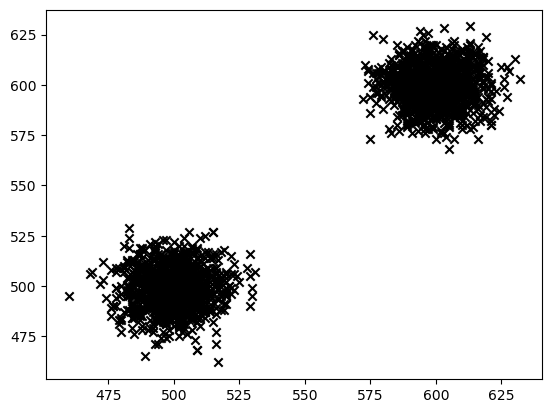

In [2]:
import matplotlib.pyplot as plt

# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement from $points$. Meaning, the same point should not be picked up twice. <br>

**Show that your function performs as desired by calling it with** $K = 2$ **and on the data_test as the** $points$.

<font color='maroon'>**Answer:**</p>

> Our function _`init`_ takes points and K as arguments and returns a numpy ndarray with K elements that are randomly selected from points. We thought of two ways of defining this function:

> * _`np.random.choice(points.shape[0], K, replace = False)`_ : this code randomly selects K elements from the rows of points and doesn't repeat them
> * _`np.random.shuffle(points)`_ - This code randomly shuffling points and selects the first K elements

>

In [3]:
def init(points, K):
    """
    Initialize the locations of the centroids, by randomly shuffling points and selecting K elements
    from dataset, as initial locations of the centroids.

   Parameters:
    - points (numpy.ndarray): 2D numpy array containing data points. Each row represents a data point, and each column a dimension.
    - K (int): number of cluster centroids to initialize. It must be less than or equal to the number of data points.
    
    Returns:
    - numpy ndarray
    """
   
    if K <= len(points): #Ensuring that K has the same, or less, size as points
        np.random.shuffle(points)
        return points[:K]

In [4]:
print("The locations of the centroids by random selection of K points are: \n", init(data_test, 2))

The locations of the centroids by random selection of K points are: 
 [[590 605]
 [507 507]]


### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidian distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
For the assignment you can assume that $p1$ and $p2$ are two-dimensional ndarrays points. But in general, you should assume that p1 and p2 are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. 

**Test your function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>
**Consider using the existing Numpy or Scipy packages for this task**

Can you write a function that computes the euclidian distance between two points of arbitrary dimension? <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**Show your function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

<font color='maroon'>**Answer:**</p>

> Considering the enunciation is a bit confusing, we decided to create 2 functions. The first one, _`distance_2D`_, is defined without numpy/ scipy packages and is assumed that p1 and p2 are two-dimensional ndarrays points. The second one _`distance`_ is defined using numpy packages and p1 and p2 are two ndarrays with arbitrary dimensions. It is also possible to use Scipy to calculate the distance asked, but it'd be necessary to import distance from scipy. It would look like this:

>`def distance(p1,p2):`

>> `return sc.spatial.distance.euclidean((np.array(p1)), (np.array(p2))) `


>In this context, another function we could use from the scipy package is the _`sc.spatial.distance.minkwoski(x,y)`_. Adicionally, we wanted to show that it is also possible to write the euclidean distance without using built-in functions:

>`def distance(p1,p2):`

>>`sq_of_dif=0`

>>`sq_of_dif = np.square(np.array(p1) - np.array(p2))`

>>`sum_of_sq = np.sum(sq_of_dif)`

>>`return np.sqrt(sum_of_sq)`

In [5]:
def distance_2D(p1, p2):
    
    """
    Calculate Euclidean distance between two 2D points (p1 and p2, that must be the same shape).
    
    Parameters:
    - p1 (numpy.ndarray): 1D numpy array representing the first 2D point, with [x, y] coordinates.
    - p2 (numpy.ndarray): 1D numpy array representing the second 2D point, with [x, y] coordinates.
    
    Returns:
    -  Euclidean distance between the given arguments.
    """
    
    interior  = 0
    for i in range(len(p1)):
        interior += (p1[i]-p2[i])**2
    return interior**(1/2)

In [6]:
# Test variables do not change
p1 = np.array([1,3])
p2 = np.array([7,2])

In [7]:
print("The distance between p1 and p2 is:", distance_2D(p1, p2))

The distance between p1 and p2 is: 6.082762530298219


In [8]:
def distance(p1,p2):
    """
    Calculate the Euclidean distance between two multidimensional points: numpy arrays 'p1' and 'p2', and both points must have the same shape.  
    
    Parameters:
    - p1 (numpy.ndarray): numpy array representing the first point.
    - p2 (numpy.ndarray): numpy array representing the second point.
    
    Returns:
    - Euclidean distance between the two given arguments.
    
    """
    
    return np.linalg.norm(np.array(p1) - np.array(p2))

In [9]:
p3 = (1,3,-9,12)
p4 = (7,2,0,5)

In [10]:
print("The distance between p3 and p4 is:", distance(p3, p4))

The distance between p3 and p4 is: 12.922847983320086


In [11]:
print("The distance between p1 and p2 is:", distance(p1,p2))

The distance between p1 and p2 is: 6.082762530298219


### Step 4

Write a function named <b>centroid</b> that takes one argument: $points$.<br>

The argument $points$ should be a ndarray with the coordinates of a set of observations.<br>

The function <b>centroid</b> should return an ndarray with $d$ values (being $d$ the number of dimensions)</span>, the $n^{th}$ index of the returned output ndarray should thus correspond to the averaged of the values in the $n^{th}$ column of the points ndarray. In other words, correspond to the average position along a specific dimension of observations in $points$.</span>

**Test your function and check that it works by using the ndarray TEST**


<font color='maroon'>**Answer:**</p>

> As asked, we defined a function called `centroid` that takes one argument called `points` and returns the mean position of each dimension of observations in points.

In [12]:
def centroid(points):
    """
    Calculates the centroid (average coordinates, i.e. mean coordinate for each dimension) of a set of observations ('points').
    
    Parameters:
    - points (numpy.ndarray): 2D np.array where each row is a data point, and each column a dimension.
    
    Returns:
    - Average coordinates (numpy.ndarray): 1D np.array representing the centroid of the data points.
    """
    
    return np.mean(points, axis = 0) #axis = 0 : row

In [13]:
#Test variables do not change the values
TEST = np.array([[1,2,3,4,5],[0,0,1,1,1],[0,1,2,4,5]])
print(TEST)

[[1 2 3 4 5]
 [0 0 1 1 1]
 [0 1 2 4 5]]


In [14]:
centroid(TEST)

array([0.33333333, 1.        , 2.        , 3.        , 3.66666667])

### Step 5

Write a function <b>cupdate</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 

The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).<br>

The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.<br>

Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the total number of clusters.

The function <b>cupdate</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as points (dimensions) and length K (rows).

**Test your function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

<font color='maroon'>**Answer:**</p>

>The _`cupdate`_ function returns the coordinates of the centroid of each cluster. 

>So basicaly, for this exercise we created an empty ndarray called `cent` with the dimensions asked above - same number of columns as points (`points.shape[1]`) and same number of rows as clusters (`len(np.unique(clusters))`). Then within a _for loop_ - for k in range of the total number of clusters - we calculate the mean of the points belonging in the cluster k (`points[clusters == k]`) with the centroid function previously defined (`centroid(points[clusters == k])`) and save it in _`cent[k]`_ and return cent.

>We decided to use _`np.empty`_ instead of _`np.zeros`_, because it's faster. Since np.zeros takes time defining each element with a value - in this case is zero -, the np.empty just creates the ndarray without initializing all elements.

In [15]:
def cupdate(points, clusters):
    """
    Calculates the centroids of clusters based on a set of observations ('points') and clusters assignment ('clusters').
    Computes the average coordinates of data points associated with each cluster.
    
    Parameters:
    - points (numpy.ndarray): containing the coordinates, each row represents a data point, each column a dimension.
    - clusters (numpy.ndarray): indicates the cluster to which each point is associated.
    
    Returns:
    - cent (numpy.ndarray): each row represents the centroid of a cluster (average coordinates of the points associated to each cluster);
                                 has the same number of columns as points (dimensions) and length K (rows).
    """
    K = len(np.unique(clusters)) #number of clusters
    cent = np.empty((K, points.shape[1])) #matrix with same number of rows as clusters and of columns as points
    for k in range(K):  
        cent[k] = centroid(points[clusters == k]) #calculating the mean of the points belonging in the cluster k with the 
                                                # centroid function defined previously
    return cent

In [16]:
# Test variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [17]:
cen = cupdate(p,c)
print("The coordinates of each centroid are: \n", cen)

The coordinates of each centroid are: 
 [[0.44995487 0.55986467]
 [0.53760985 0.53912646]
 [0.8922063  0.26672425]]


### Step 6

Write a function <b>pupdate</b> that takes two input arguments: $points$ and $centroids$.<br>

The function <b>pupdate</b> should return a one-dimensional ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a *$d$ by $k$* distance matrix between each of the $d$ points and the $k$ centroids.

**Test your function by calling it and passing the array p (as defined above) with the output of cupdate, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why?). Print this result and save it in a variable called new_clusters**

<font color='maroon'>**Answer:**</p>

>For this exercise, our function _`pupdate`_ returns the index of the cluster with the lowest distance from each point _`closest_index`_. The "trickiest" part here is the double _for loop_. So, for each point _i_ in the same number of rows that points has, and for each _k_ in the range of the length of centroids, we analyse each distance from point i to cluster k - meaning *we're creating a matrix with distances from every point to every cluster*. Finally our function returns the index of the cluster with lowest distance _np.argmin(euclidean_dist, axis = 1)_.

>Lastly, we can compare _new_clusters_ and _c_ and see that they're not exactly the same and to make this clear, we need to understand what the pupdate and cupdate funtions do. The cupdate function takes 2 arguments, points and clusters, and returns the centroid of each cluster. The pupdate function takes 2 arguments, points and centroids, and returns the index of the centroid of each point, meaning the cluster of each point. _**This means the fact that new_clusters and c are different is because `new_clusters` is a revised version of `c`**_. new_clusters is the result of the pupdate funtion with p as points and cen as centroids and cen is the result of the cupdate function with p as points and c as clusters.

In [18]:
def pupdate(points, centroids):
    """
    Calculates the distances between each data point in 'points' and all centroids in 'centroids'.
    Then, it assigns each data point to the nearest centroid based on the calculated distances.
    So, it updates cluster assignments for data points based on the nearest centroids.
    
    Parameters:
    - points (numpy.ndarray): numpy array where each row represents a data point, and each column a dimension.
    - centroids (numpy.ndarray): numpy array where each row represents a cluster centroid, and each column a dimension.
    
    Returns:
    - closest_index (numpy.ndarray): 1D numpy array that indicates the index of the nearest centroid to each data point.   
    """
    closest_index = np.empty(points.shape[0]) #ndarray of empty values with the same number of rows as points
    euclidean_dist = np.empty((points.shape[0], len(centroids))) #ndarray of 2D - same number of rows as points, 
                                                                   #and same number of columns as centroids
    for i in range(points.shape[0]): #iterate by the number of rows in points:
        for k in range(centroids.shape[0]): #iterate by the number of centroids:
            euclidean_dist[i, k] = distance(points[i], centroids[k]) #calculating the distance from point i to cluster k 
            
    closest_index = np.argmin(euclidean_dist, axis = 1) #storing the index of the cluster with the lowest distance from each point
    return closest_index

In [19]:
new_clusters = pupdate(p,cen)
new_clusters

array([2, 0, 0, 1, 2, 0, 1, 1, 0, 0], dtype=int64)

In [20]:
c

array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

### Step 7

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>

The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidian distance (the square error) between the old and new positions of each centroid.  This will give us a quantity that tell us whether our algorithm is still converging to the solution or  got to good approximation.</span> We will use the function error to obtain an estimate of whether the algorithm is still converging to the solution (that is the centroids are, in average, moving a lot) or if we entered a scenario of small steps (that is the centroids are, in average, not moving that much). 

We will use this information combined with a **tolerance threshold** in regards to the average change in the centroids positions to decide if it is a good time to stop the algorithm. You should make this decision.


**Test your function and then report the distance between the centroids computed in Step 5, cen, and the centroids that you can compute using the function cupdate with the arguments points and new_clusters.**

<font color='maroon'>**Answer:**</p>

>The _`error`_ function returns the average euclidean distance between two positions of each centroid, meaning it returns an estimate of whether the algotithm is converging to the solution or not. And takes two arguments, _`oldcentroids`_ and _`newcentroids`_.

>To accomplish this, we started by creating _`dist`_ and ndarray of empty values, with the same number of rows as oldcentroids. Then we started a _for loop_, in which for _k_ in range of the number of rows in oldcentroids, we calculated the distance between each point: _`dist[k] = distance(oldcentroids[k], newcentroids[k])`_. And finally, we return the average distance: _`np.mean(dist)`_.

In [21]:
def error(oldcentroids, newcentroids):
    """
    Calculates the average Euclidean distance between corresponding old and new centroids,
        to quantify the change in centroids positions between iterations of a clustering algorithm.
    
    Parameters:
    - oldcentroids (numpy.ndarray): 2D numpy array of the old centroids, where each row is a centroid, and each column a dimension.
    - newcentroids (numpy.ndarray): 2D numpy array of the new centroids, where each row is a centroid and each column a dimension.

    Returns:
    - Average Euclidean distance between corresponding old and new centroids (float).   
    """
    
    dist = np.empty(oldcentroids.shape[0]) #ndarray of empty values with the same number of rows as oldcentroids
    for k in range(oldcentroids.shape[0]):
        dist[k] = distance(oldcentroids[k], newcentroids[k]) #for each row (centroid), we're storing the distance
    return np.mean(dist) #the mean of the distances

In [22]:
print("The average distance between old centroids (cen) new centroids (cupdate) is:\n", error(cen, cupdate(p, new_clusters)))

The average distance between old centroids (cen) new centroids (cupdate) is:
 0.17635560837965428


### Step 8

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared previously to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a threshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

**You will need to make some decisions about the best approach to select the correct range of values to pass to init(),  particularly pay attention to the values given for K, as K-Means is extremely sensitive to the number of centroids being chosen. Justify your decision.**

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that your algorithm returnr an error. Although that shoudl not happen with the examples provided, you might want to consider implementing some heuristics to overcome those errors.However, this is an optional task, and for this homework if you bump into such errors we recommend you try to rerun your code.**

<font color='maroon'>**Answer:**</p>

>The _`kmeans`_ function returns the clusters of each point, and the locations of K centroids. It takes four arguments: _points_, _K_, _niter_ and _tol_. This function is used to perform clustering in a dataset. It basicaly selects _K_ elements of _points_ to be centroids of clusters. Then, considering the number of iterations, _niter_, the function updates the centroids or until there's a convergence (the centroids no longer move a lot) using _tol_ as a condition.

>So, we start by defining the variable centroids, that uses the _`init`_ function, meaning it randomly selects K elements of points to be centroids: _centroids = init(points, K)_

>Since there's an argument that estipulates the number of iterations _`niter`_: _for i in range(niter):_

>Then, to associate a point to a cluster, we need to use the _`pupdate`_ function: _cluster = pupdate(points, centroids)_

>Still within the for loop, we create a new array of revised centroids _`new_centroids`_ that uses the _`cupdate`_ function to calculate the centroid of each cluster: _new_centroids = cupdate(points, cluster)_

>As asked, we use _`tol`_ as a threshold to stop the algorithm by if it's below the tolerance level. This is done by evaluating the average variation in the distance between the new and previous coordinates of the centroids: _if tol > error(centroids, new_centroids):          break_

>Finaly, _`kmeans`_ returns the cluster of each point and the location of the K revised centroids: _return cluster, new_centroids_

In [23]:
def kmeans(points, niter, tol, K=2): 
    """
    Applies the K-means clustering on a dataset ('points').
   
    Parameters:
    - points (numpy.ndarray): the input data points to be clustered.
    - niter (int): maximum number of iterations for the K-means algorithm. Default is 100.
    - tol (float): tolerance level, the algorithm stops when the change in centroids is less than tol. Default is 1e-4.
    - K (int): number of clusters (centroids) to be generated. Default is 2.
    
    Returns:
    - clusters (numpy.ndarray): an array containing the cluster assignments for each data point.
    - new_centroid (numpy.ndarray): an array containing the final cluster centroids.
    """
    
    centroids = init(points, K) #Randomly selecting K elements of points to be centroids
    
    for i in range(niter): #for each iteration
        clusters = pupdate(points, centroids) #Calculating the clusters of each point
        new_centroids = cupdate(points, clusters) #Revised centroids for each cluster      
        if tol > error(centroids, new_centroids): #when the centroids aren't moving a lot
            break
    
    return clusters, new_centroids #the new one since tol is always lower than the error, meaning the new one is more correct 

It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how you can visualize your results for a sample dataset. <br>
Can you adapt the code to show your results applied to data_test with K = 2, niter = 500, tol = 0.00001.

<span style="color:red">**In this step feel free to use any other visualization library such as Seaborn. **</span>

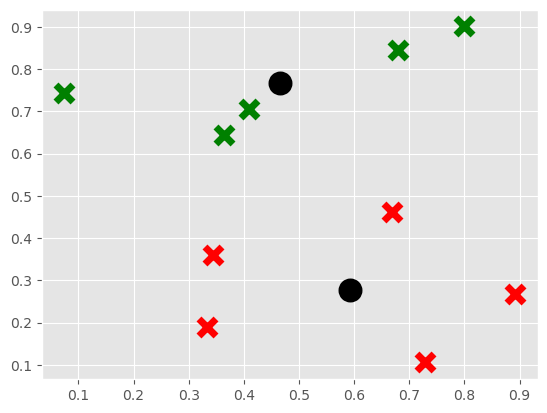

In [24]:
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b"]

# sample data for this example
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
centroids = [np.array([0.46519213, 0.76779111]),np.array([0.59329188, 0.27671958])]
clusters = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# plot each point in the centroids array
for centroid_ in centroids:
    plt.scatter(centroid_[0],centroid_[1], marker="o", color="k", s=150, linewidths=5)

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5)

# plot all elements
plt.show()

In [25]:
#Testing kmeans function with data_test, K=2, niter = 500 and tol = 0.00001
kmeans(data_test, K = 2, niter = 500, tol = 0.00001)

(array([0, 1, 1, ..., 0, 1, 0], dtype=int64),
 array([[599.49853372, 599.63538612],
        [499.65527344, 498.94433594]]))

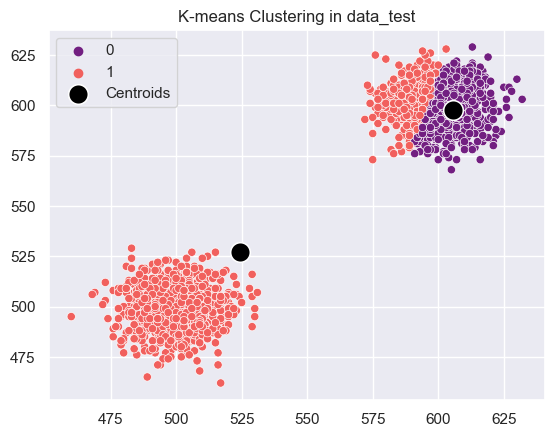

In [26]:
clusters, new_centroids = kmeans(data_test, K = 2, niter = 500, tol = 0.00001)

#Using seaborn to visualize:
import seaborn as sns

#Plot style:
sns.set(style = "darkgrid")

#Scatter plot for data_test:
sns.scatterplot(x = data_test[:,0], y = data_test[:,1], hue = clusters, palette = 'magma') 

#Scatter plot for centroids:
sns.scatterplot(x = new_centroids[:,0], y = new_centroids[:,1], marker = 'o', s = 200, color = 'black', label = 'Centroids') 

#Scatter plot title:
plt.title("K-means Clustering in data_test")

#Plot all elements:
plt.show()

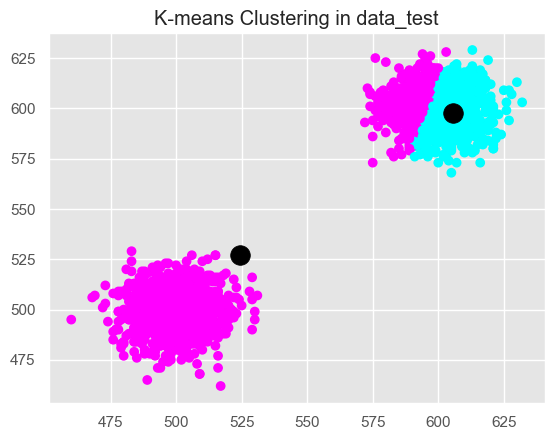

In [27]:
#Using mathplotlib to visualize:

#Plot style:
style.use('ggplot')

# remember that: clusters, new_centroids = kmeans(data_test, K = 2, niter = 500, tol = 0.00001)
# Scatter plot for data_test:
plt.scatter(data_test[:,0], data_test[:,1], c = clusters, cmap = 'cool', label = "Data_test", linewidths=1) #Scatter plot for data_test

#Scatter plot for centroids:
plt.scatter(new_centroids[:,0], new_centroids[:,1], marker = 'o', s = 200, color = 'black', label = 'Centroids') #Scatter plot for centroids

#Scatter plot title:
plt.title("K-means Clustering in data_test")

#Plot all elements:
plt.show()

### Step 9

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is a 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared Euclidean distance** of the points to the centroid of the cluster they are assigned.
The Squared of the Euclidean distance is a common measure of error that satisfies several important properties, namely it is strictly convex and smooth. It is often used in the method of Least Squares to fit linear functions to data, in which we try to find the parameters of a linear model that minimize the average of the square distances between the observed values and the values predicted by the fitted model. Here we are borrowing these concepts to measure the dispersion of points in a cluster, in other words, the error between the position of the centroid and the locations of the points associated with it.

**Test your function and report the results of using point=p, clusters=c, and centroids=cen. These are the variables that you have used in the previous steps.**

<span style="color:red">**Note: distance always refers to the euclidean distance.**</span>

<font color='maroon'>**Answer:**</p>

>The _`inertia`_ function takes three arguments, _points_, _clusters_ and _centroids_. And returns the number of clusters and the average square euclidean distance. This function is used to evaluate the quality of a kmeans clustering process, by selecting the optimal number of clusters.

>So, firstly we started by calculating the number of clusters, _`K`_ : _len(np.unique(clusters))_

>We created a empty array with the same number of rows as _points_: _np.empty(points.shape[0])_

>Then, we created a _for loop_ in range of the number of rows in points, and calculated the euclidean distance between each point and their assigned centroid: _dist[i] = distance(points[i], centroids[clusters[i]])_

>Finally, we calculated the mean square of _`dist`_: _np.mean(np.square(dist))_

In [28]:
def inertia(points, clusters, centroids):
    """
    Calculates the inertia of a clustering result, that is a measure of the quality of the clustering (the lower, the better).

    Parameters:
    - points (numpy.ndarray): input data points that were clustered.
    - clusters (numpy.ndarray): an array containing cluster assignments for each data point.
    - centroids (numpy.ndarray): an array containing the coordinates of cluster centroids.

    Returns:
    - K (int): number of unique clusters present in the 'clusters' array.
    - avg_sq_dist (float): the average squared euclidean distance of data points to their assigned centroids.
    """      

    K = len(np.unique(clusters)) #Number of clusters
    dist = np.empty(points.shape[0]) #ndarray of empty values with the same number of rows as points
    
    for i in range(points.shape[0]):
        dist[i] = distance(points[i], centroids[clusters[i]]) #Storing each distance between point i and their assigned centroid

    avg_sq_dist = np.mean(np.square(dist)) # mean square euclidean distance
    return K, avg_sq_dist

In [29]:
#Testing our inertia function with p, c and cen:
inertia(p, c, cen)

(3, 0.10954209828084607)

### Step 10

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>inertia</b> to identify the most suitable number of clusters. <br>
**You must consider doing some visual inspection and reporting**. For instance:
- Inspect visually the dataset before performing the clustering.
- Report the inertia values as a line plot.
- Show the result of your clustering.

***Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).***

In [30]:
d_points = pd.read_csv("https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1", header=None).to_numpy()
d_points

array([[664159, 550946],
       [665845, 557965],
       [597173, 575538],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]], dtype=int64)

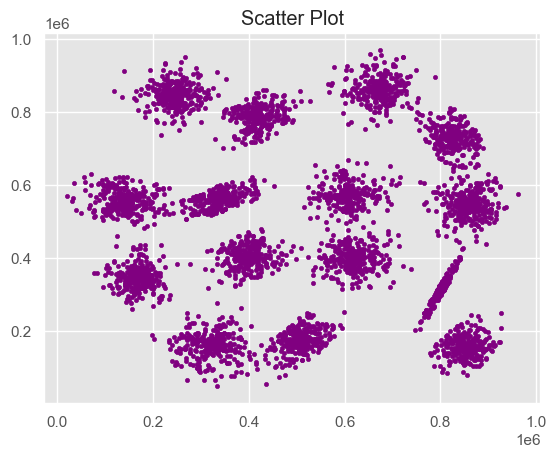

In [31]:
x = d_points[:, 0]
y = d_points[:, 1]

# Creating a scatter plot using Seaborn
plt.scatter(d_points[:,0], d_points[:,1], color = 'purple', label = "Points", marker = ".") #Scatter plot for data
plt.title('Scatter Plot')
plt.show()

>So after loading the data file into a numpy array, we were able to inspect the data set - _`d_points`_ - before performing the clustering. To achive this, we simply created a scatter plot. As it can be seen above, there's about 15 clusters, but this doesn't mean that fifteen is the most correct number of clusters to use when clustering the data. 

>So, we started by calculating the inertia values for different clusters. We decided to do it in a range of 2 to 17, since one/ zero clusters would make no sense and a lot more than 15 wouldn't either: _for i in range(2,17):_

>In this _for loop_, we calculated _`kmeans`_ for each possible number of clusters- _clusters, new_centroids = kmeans(d_points, K = i, niter = 10, tol = 0.00001)_ - we chose niter = 10 to do it a little more quickly, although it would be better to have more iterations to get a better result. And also calculated the respective inertia for each number of clusters: _K, avg_sq_dist = inertia(d_points, clusters, new_centroids)_.

>We then appended the results regarding the inertia test in _`inertia_K`_ and _`inertia_dist`_.

>To visualize these inertia values, we made a scatter plot using _mathpotlib_ and named it **"Inertia for each number of Clusters"**

In [32]:
#Starting by calculating the inertia values for different clusters:
inertia_K = [] #empty list
inertia_dist = [] #empty list

for i in range(2,17):
    clusters, new_centroids = kmeans(d_points, K = i, niter = 20, tol = 0.00001) #Calculated kmeans for each possible number of clusters
    K, avg_sq_dist = inertia(d_points, clusters, new_centroids) #Calculated the inertia for each new centroid 
    inertia_dist.append(avg_sq_dist)
    inertia_K.append(K)

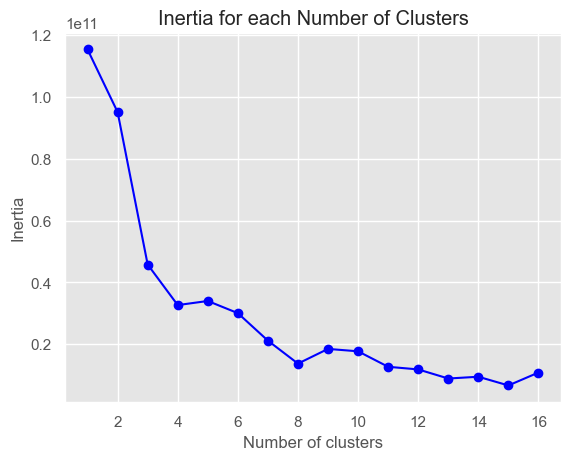

In [33]:
#Visualizing the inertia values:
plt.plot(inertia_K, inertia_dist, marker = "o", color = "blue")
plt.title ('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia for each Number of Clusters")
plt.show()

>The elbow method states that the value that represents the elbow of the curve is the same number of clusters to use.

>Using the elbow method, we can say by visualizing the scatter plot above, that the best number of clusters to use is five. 

>So knowing this, we made a new scatter plot with all data and defined the number of clusters, five: _clusters, new_centroids = kmeans(d_points, K = 5, niter = 20, tol = 0.00001)_

>As it can be seen below, this is the result of our clustering

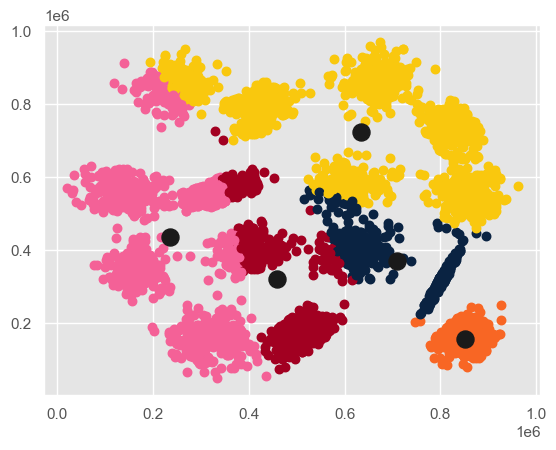

In [34]:
clusters, new_centroids = kmeans(d_points, K = 5, niter = 20, tol = 0.00001)
# Assigned the tuple resulting from 'kmeans' to the variables 'clusters' and 'new_centroids'

# Defining the style of the plot:
style.use('ggplot')
colors = ["#0A2342","#F9C80E","#F86624","#A20021","#F46197"]

# Plot each point in 'd_points', colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(d_points[i,0], d_points[i,1], marker=".", color=colors[clusters[i]], s=150, linewidths=1)

# plot each point in the centroids array
for centroid in new_centroids:
    plt.scatter(centroid[0], centroid[1], marker="o", color="k", s=150, linewidths=1)    

# plot all elements
plt.show()